In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
road_transport_df = pd.read_csv("road_transport_electricity_forecast.csv")
heating_df = pd.read_csv("HEating Electricity Consumption Forcast.csv")
appliances_df = pd.read_csv("Appliences Electricity Consumption Forcast.csv")

In [3]:
appliances_overall_df = appliances_df[["Year", "Overall Total"]]
heating_overall_df = heating_df[["Year", "Overall Total"]]
road_transport_overall_df = road_transport_df[["Year", "Road transport, Electricity_GWh"]]

In [4]:
combined_df = pd.merge(road_transport_overall_df, heating_overall_df, on="Year", how="outer")
combined_df = pd.merge(combined_df, appliances_overall_df, on="Year", how="outer")

combined_df = combined_df.sort_values(by="Year").reset_index(drop=True)

combined_df_2005 = combined_df[combined_df["Year"] >= 2005].reset_index(drop=True)

In [5]:
print(combined_df_2005)

      Year  Road transport, Electricity_GWh  Overall Total_x  Overall Total_y
0   2005.0                        19.189500     34355.020000     85323.000000
1   2006.0                        18.724300     32284.880000     80470.000000
2   2007.0                        18.375400     29854.210000     80693.000000
3   2008.0                        18.259100     35599.430000     81304.000000
4   2009.0                        18.026500     35227.270000     78967.000000
5   2010.0                        18.026500     36308.860000     79616.000000
6   2011.0                        21.166600     28877.290000     78181.000000
7   2012.0                        26.400100     27272.350000     76007.000000
8   2013.0                        32.912900     25527.850000     71574.000000
9   2014.0                        67.570300     23515.860000     69306.000000
10  2015.0                        97.110500     23562.380000     67549.000000
11  2016.0                       132.930900     24562.560000    

In [6]:
combined_df_2005['Tech Overall'] = combined_df_2005.drop(columns=['Year']).sum(axis=1)

combined_df_2005 = combined_df_2005.drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)

print(combined_df_2005)

      Year  Road transport, Electricity_GWh  Overall Total_x  Overall Total_y  \
0   2005.0                        19.189500     34355.020000     85323.000000   
1   2006.0                        18.724300     32284.880000     80470.000000   
2   2007.0                        18.375400     29854.210000     80693.000000   
3   2008.0                        18.259100     35599.430000     81304.000000   
4   2009.0                        18.026500     35227.270000     78967.000000   
5   2010.0                        18.026500     36308.860000     79616.000000   
6   2011.0                        21.166600     28877.290000     78181.000000   
7   2012.0                        26.400100     27272.350000     76007.000000   
8   2013.0                        32.912900     25527.850000     71574.000000   
9   2014.0                        67.570300     23515.860000     69306.000000   
10  2015.0                        97.110500     23562.380000     67549.000000   
11  2016.0                  

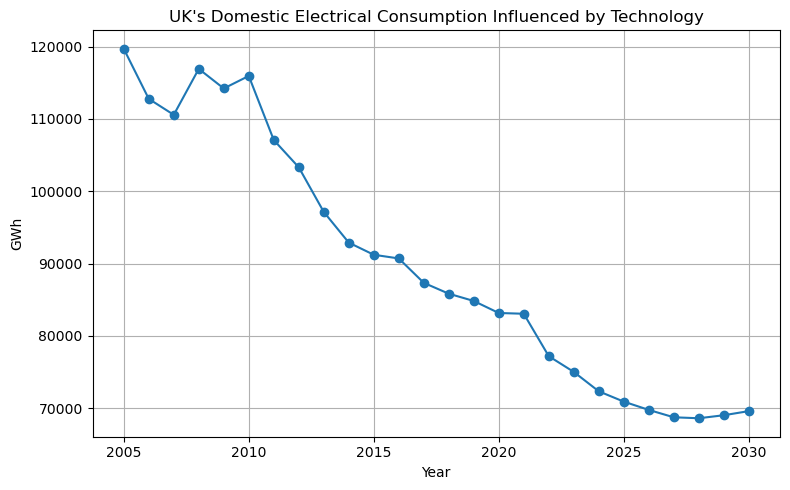

In [7]:
plt.figure(figsize=(8,5))
plt.plot(combined_df_2005['Year'], combined_df_2005['Tech Overall'], marker='o')
plt.title("UK's Domestic Electrical Consumption Influenced by Technology")
plt.xlabel('Year')
plt.ylabel('GWh')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
combined_df_2005.to_csv("UK's Domestic Electrical Consumption Influenced by Technology Forcast.csv", index=False)